<a href="https://colab.research.google.com/github/brostromb/ai-ml-principles-exercises/blob/main/ai_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hello world!')

hello world!


In [2]:
import sklearn

In [3]:
import sklearn.datasets as datasets

In [6]:
data = datasets.load_digits()

In [7]:
type(data)

sklearn.utils.Bunch

In [8]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [9]:
len(data.images)

1797

In [24]:
(data.images[0] / 16 * 255).astype(np.uint8)

array([[  0,   0,  79, 207, 143,  15,   0,   0],
       [  0,   0, 207, 239, 159, 239,  79,   0],
       [  0,  47, 239,  31,   0, 175, 127,   0],
       [  0,  63, 191,   0,   0, 127, 127,   0],
       [  0,  79, 127,   0,   0, 143, 127,   0],
       [  0,  63, 175,   0,  15, 191, 111,   0],
       [  0,  31, 223,  79, 159, 191,   0,   0],
       [  0,   0,  95, 207, 159,   0,   0,   0]], dtype=uint8)

In [18]:
data.target[0]

0

In [19]:
import numpy as np

In [20]:
np.max(data.images)

16.0

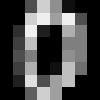

In [34]:
from PIL import Image
Image.fromarray((data.images[0] / 16 * 255).astype(np.uint8), 'L').resize((100,100), resample=Image.NEAREST)

0


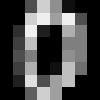

In [37]:
from PIL import Image
i=0
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255).astype(np.uint8), 'L').resize((100,100), resample=Image.NEAREST)

7


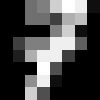

In [44]:
from PIL import Image
i=7
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255).astype(np.uint8), 'L').resize((100,100), resample=Image.NEAREST)

In [ ]:
# träna modellen
# viktigt att splitta datasetet

In [45]:
data.images.shape

(1797, 8, 8)

In [47]:
data.images.reshape((len(data.images),-1)).shape

(1797, 64)

In [46]:
from sklearn.model_selection import train_test_split

In [48]:
flat_dataset = data.images.reshape((len(data.images),-1))
x_train, x_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size=0.8)

In [51]:
x_test.shape

(360, 64)

4


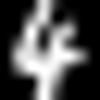

In [55]:
print(y_train[0])
Image.fromarray((x_train[0].reshape(8,8)/16*255).astype(np.uint8),'L').resize((100,100))

6


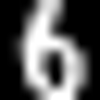

In [57]:
print(y_test[100])
Image.fromarray((x_test[100].reshape(8,8)/16*255).astype(np.uint8),'L').resize((100,100))

In [59]:
from sklearn import svm

In [61]:
model = svm.SVC(gamma=0.001)
model.fit(x_train, y_train)

SVC(gamma=0.001)

In [64]:
model.predict(x_train[0:10])

array([4, 8, 7, 7, 8, 2, 4, 5, 9, 4])

In [65]:
y_train[0:10]

array([4, 8, 7, 7, 8, 2, 4, 5, 9, 4])

In [66]:
model.predict(x_test[0:10])

array([7, 1, 1, 1, 1, 2, 1, 6, 0, 7])

In [67]:
y_test[0:10]

array([7, 1, 1, 1, 1, 2, 1, 6, 0, 7])

In [68]:
from sklearn import metrics
predicted = model.predict(x_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00        31
           3       1.00      0.97      0.99        39
           4       1.00      1.00      1.00        35
           5       0.98      1.00      0.99        40
           6       1.00      1.00      1.00        41
           7       1.00      0.98      0.99        43
           8       1.00      1.00      1.00        27
           9       0.97      1.00      0.98        31

    accuracy                           0.99       360
   macro avg       0.99      1.00      0.99       360
weighted avg       0.99      0.99      0.99       360



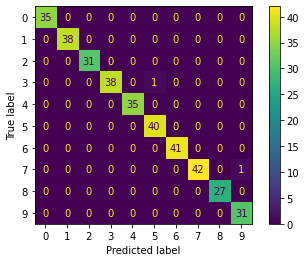

In [69]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)